### Problem statement - Task is to build a  ML model will predict the order amount that a customer is likely to place within a specified time frame, based on historical data and patterns.This prediction helps anticipate customer behavior and assists in planning and managing resources for fulfilling future orders.

# Milestone - 1

In [1]:
import pandas as pd
import numpy as np
#1
#Use the PRS dataset to create a dataframe
df = pd.read_csv('Final.csv')

In [2]:
# 2
#Check the description of the dataframe
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [3]:
# 3
# Check the shape of the dataframe
df.shape

(1101925, 16)

In [4]:
# 4
# Check the data frame informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [5]:
# 5
# Check for the Null values in the dataframe
df.isnull()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101921,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101922,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101923,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [6]:
# 6
# Replace all the null values with "NaN"
df.fillna(np.NaN, inplace=True)
df.head(20)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,20220101,160023,NR04,787347798,"1065,33",20220107,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,20220102,73006,NR03,795887697,"0,00",20211231,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,20220102,110022,NR04,884689948,"302,85",20220106,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,20220102,130024,NR02,814096053,"8380,69",20220106,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,20220102,133014,NR03,901859762,"545,85",20220107,EUR,64.0,1210183107


In [7]:
# 7
# Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


In [8]:
# q8
# Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


In [9]:
# 9
# Sanity check - Check how many records are having order date greater than the delivery date
count = df.loc[(df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE'])]
print(len(count))

27142


In [10]:
#10
# Remove those records where order date is greater than the delivery date 
df.drop(df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]].index,inplace=True)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


In [11]:
#11
# Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.
cnt_dash=df['ORDER_AMOUNT'].str.contains('-').sum()
print(cnt_dash)

32


In [12]:
#12
# Replace “-” with “” from the “ORDER_AMOUNT” field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', ' ')

In [13]:
#13
# Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..
cnt_com = df['ORDER_AMOUNT'].str.contains(',').sum()
print(cnt_com)

1073406


In [14]:
#14
# Replace “,” with “.” from the “ORDER_AMOUNT” field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

In [15]:
#15
# Count the number of records where the order date and the delivery date are same
cnt_date = (df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()
print("Count = ", cnt_date)

Count =  100437


In [16]:
#16
# Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
cnt_curr = df.groupby('ORDER_CURRENCY').size()
print(cnt_curr)

ORDER_CURRENCY
AED      7852
AUD     64200
BHD        32
CAD     55065
CHF      5259
CZK      2178
EUR    253196
GBP     22028
HKD      6198
HU1      1377
KWD         7
MYR     13946
NZD        79
PLN     11861
QAR        12
RON      4731
SAR        14
SEK         4
SGD      3909
USD    622835
dtype: int64


In [17]:
# 17
# Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column.
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}
df['amount_in_usd'] = df['ORDER_AMOUNT']

for index, row in df.iterrows():
    currency = row['ORDER_CURRENCY']
    if currency != 'USD':
        conversion_rate = conversion_rates[currency]
        amount_usd = float(row['ORDER_AMOUNT']) * float(conversion_rate)
        df.loc[index, 'amount_in_usd'] = amount_usd

In [18]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0


In [19]:
# 18
# Check for values “0” in the "'amount_in_usd” column
cnt_0 = (df['amount_in_usd'] == 0).sum()
cnt_0

112291

In [20]:
#19
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)

In [21]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0,12103318114260


In [22]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0,12103514003290


# Milestone - 2

# 1. Create a Histogram on DISTRIBUTION_CHANNEL using matplotlib

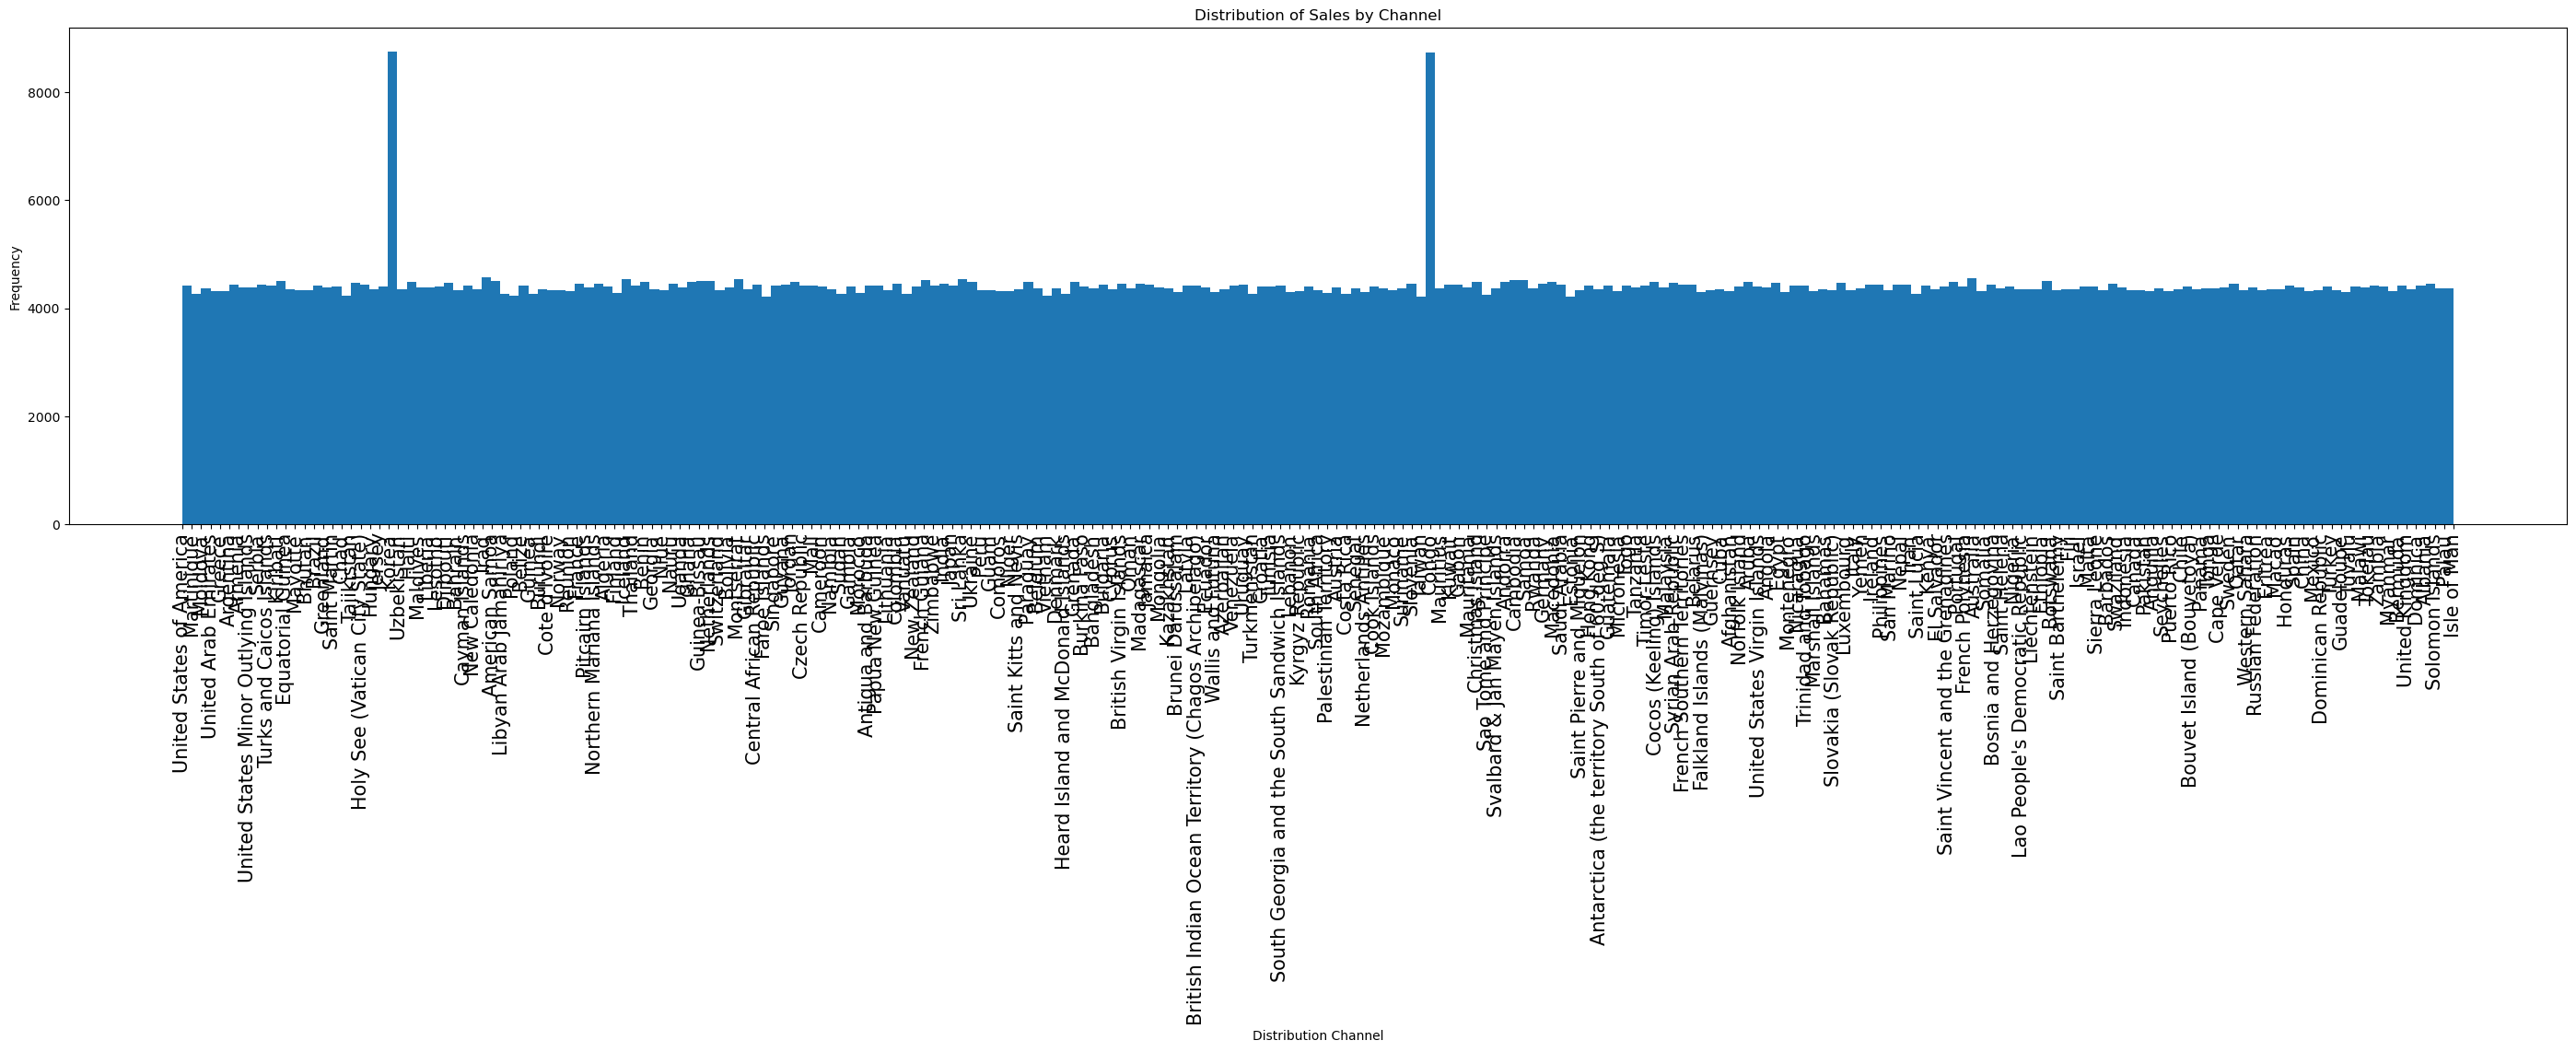

In [23]:
# It depicts the relation between frequency of distribution channel (i.e The country where the shipment has been delivered.)
import matplotlib.pyplot as plt
plt.figure(figsize=(35,7))
plt.hist(df['DISTRIBUTION_CHANNEL'],bins=243)
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
plt.xticks(rotation=90,fontsize=15)
plt.title('Distribution of Sales by Channel')
plt.show()

# 2. Create a Pie Chart on ORDER_CURRENCY.

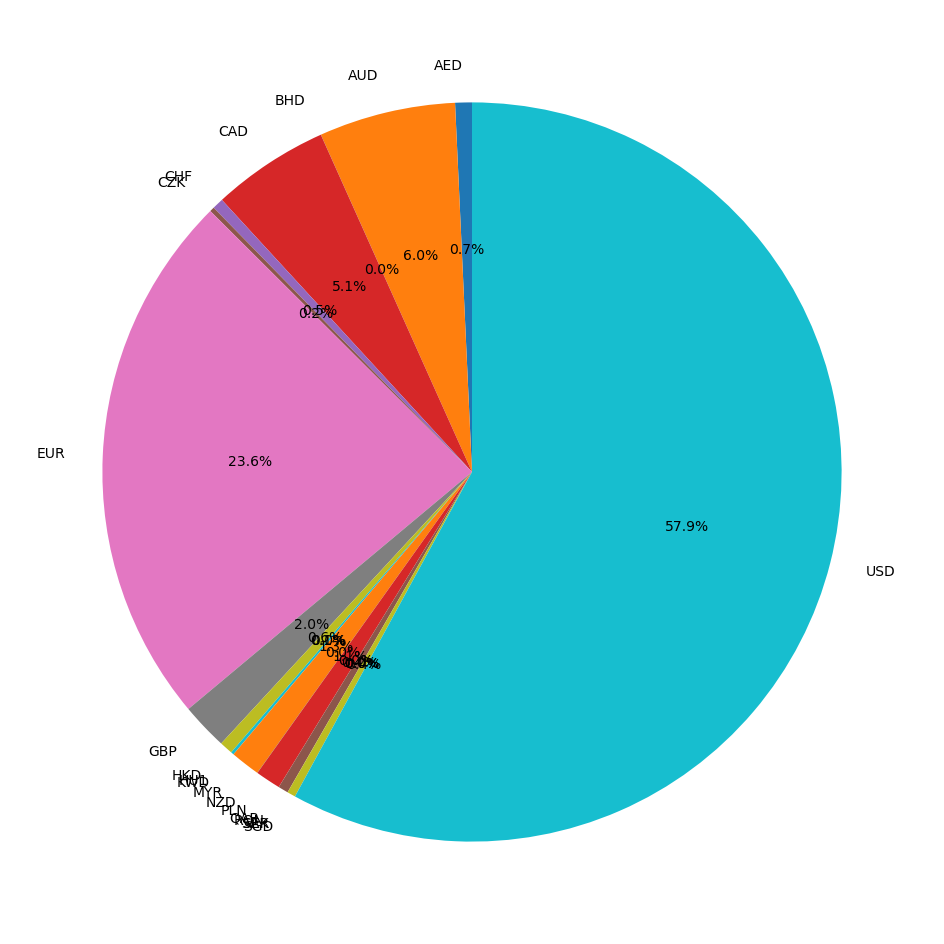

In [24]:
# Each section represents the percentage of deals happened in particular currency.
plt.figure(figsize=(15,12))
cnt_curr = df.groupby('ORDER_CURRENCY').size()
plt.pie(cnt_curr, labels=cnt_curr.index, autopct='%1.1f%%',startangle=90)
plt.show()

# 3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL.


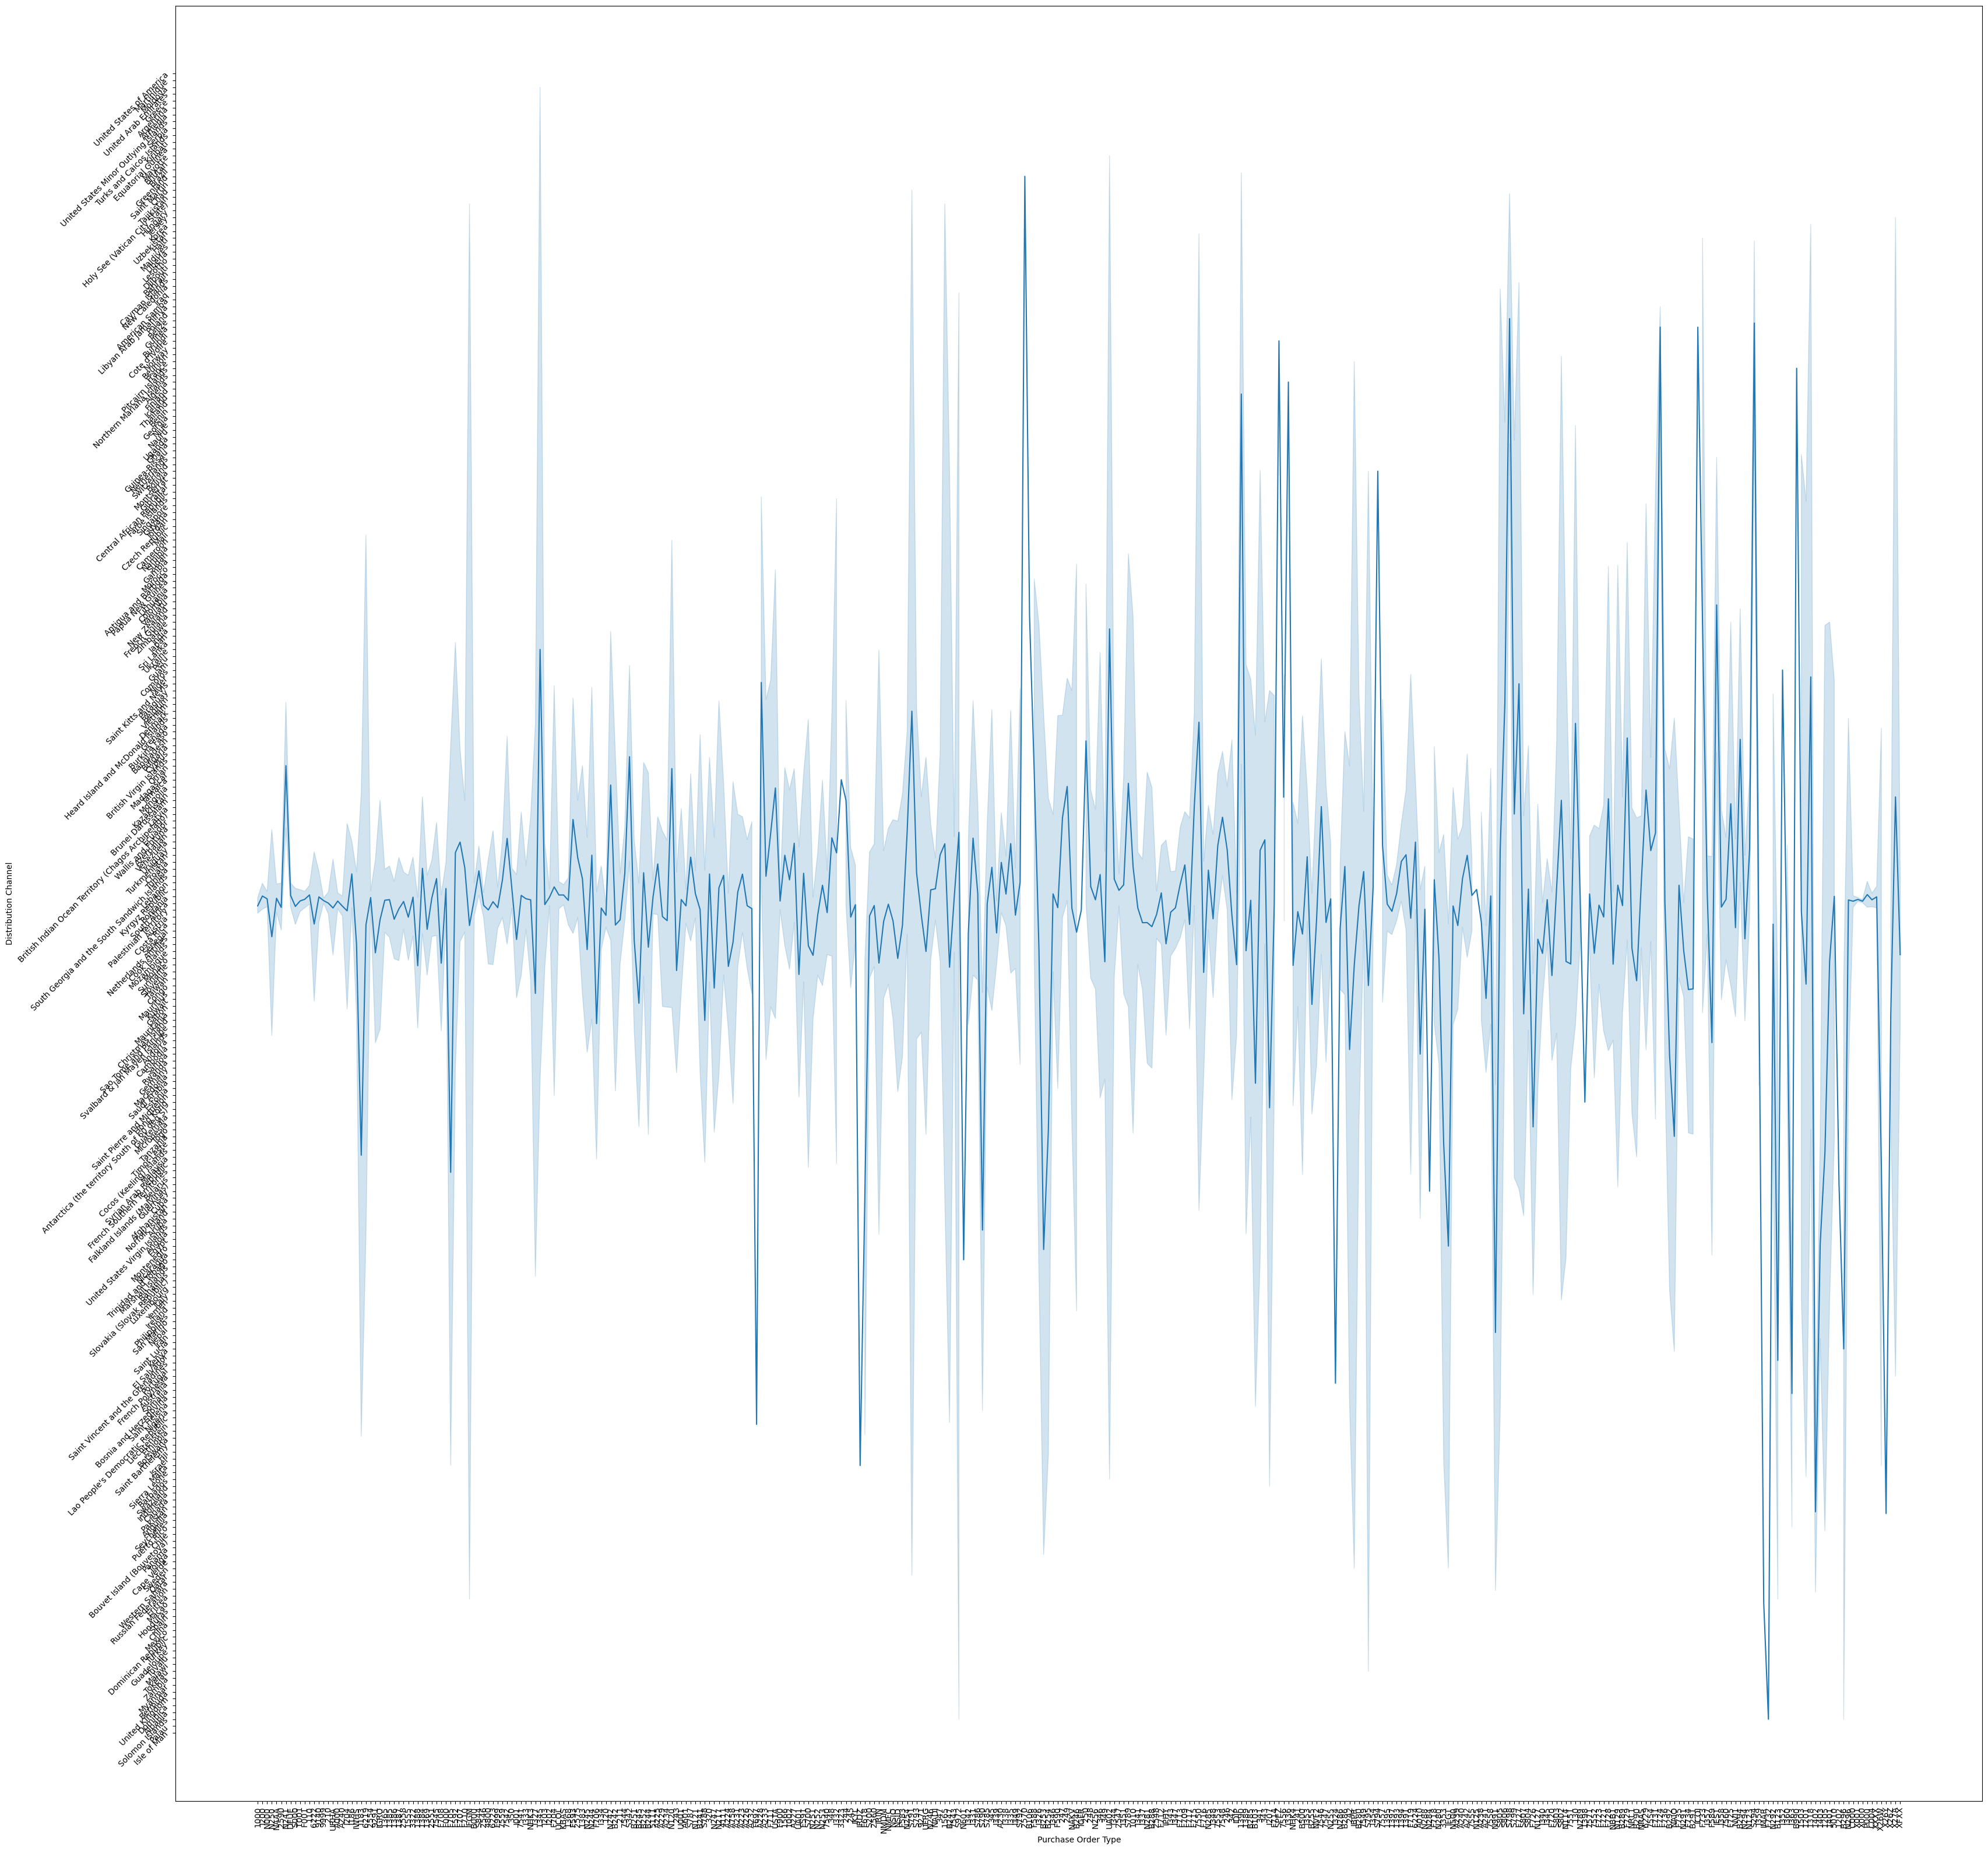

In [25]:
# This line chart will illustrate the relationship between PURCHASE_ORDER_TYPE(i.e  the category of the Purchase Order) and 
# DISTRIBUTION_CHANNEL(i.e The country where the shipment has been delivered.)
import seaborn as sns  

plt.figure(figsize=(40,40))
sns.lineplot(x="PURCHASE_ORDER_TYPE", y="DISTRIBUTION_CHANNEL", data=df)

plt.xlabel("Purchase Order Type")
plt.ylabel("Distribution Channel")

plt.xticks(rotation=90)
plt.yticks(rotation=45)

plt.show()

# 4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd

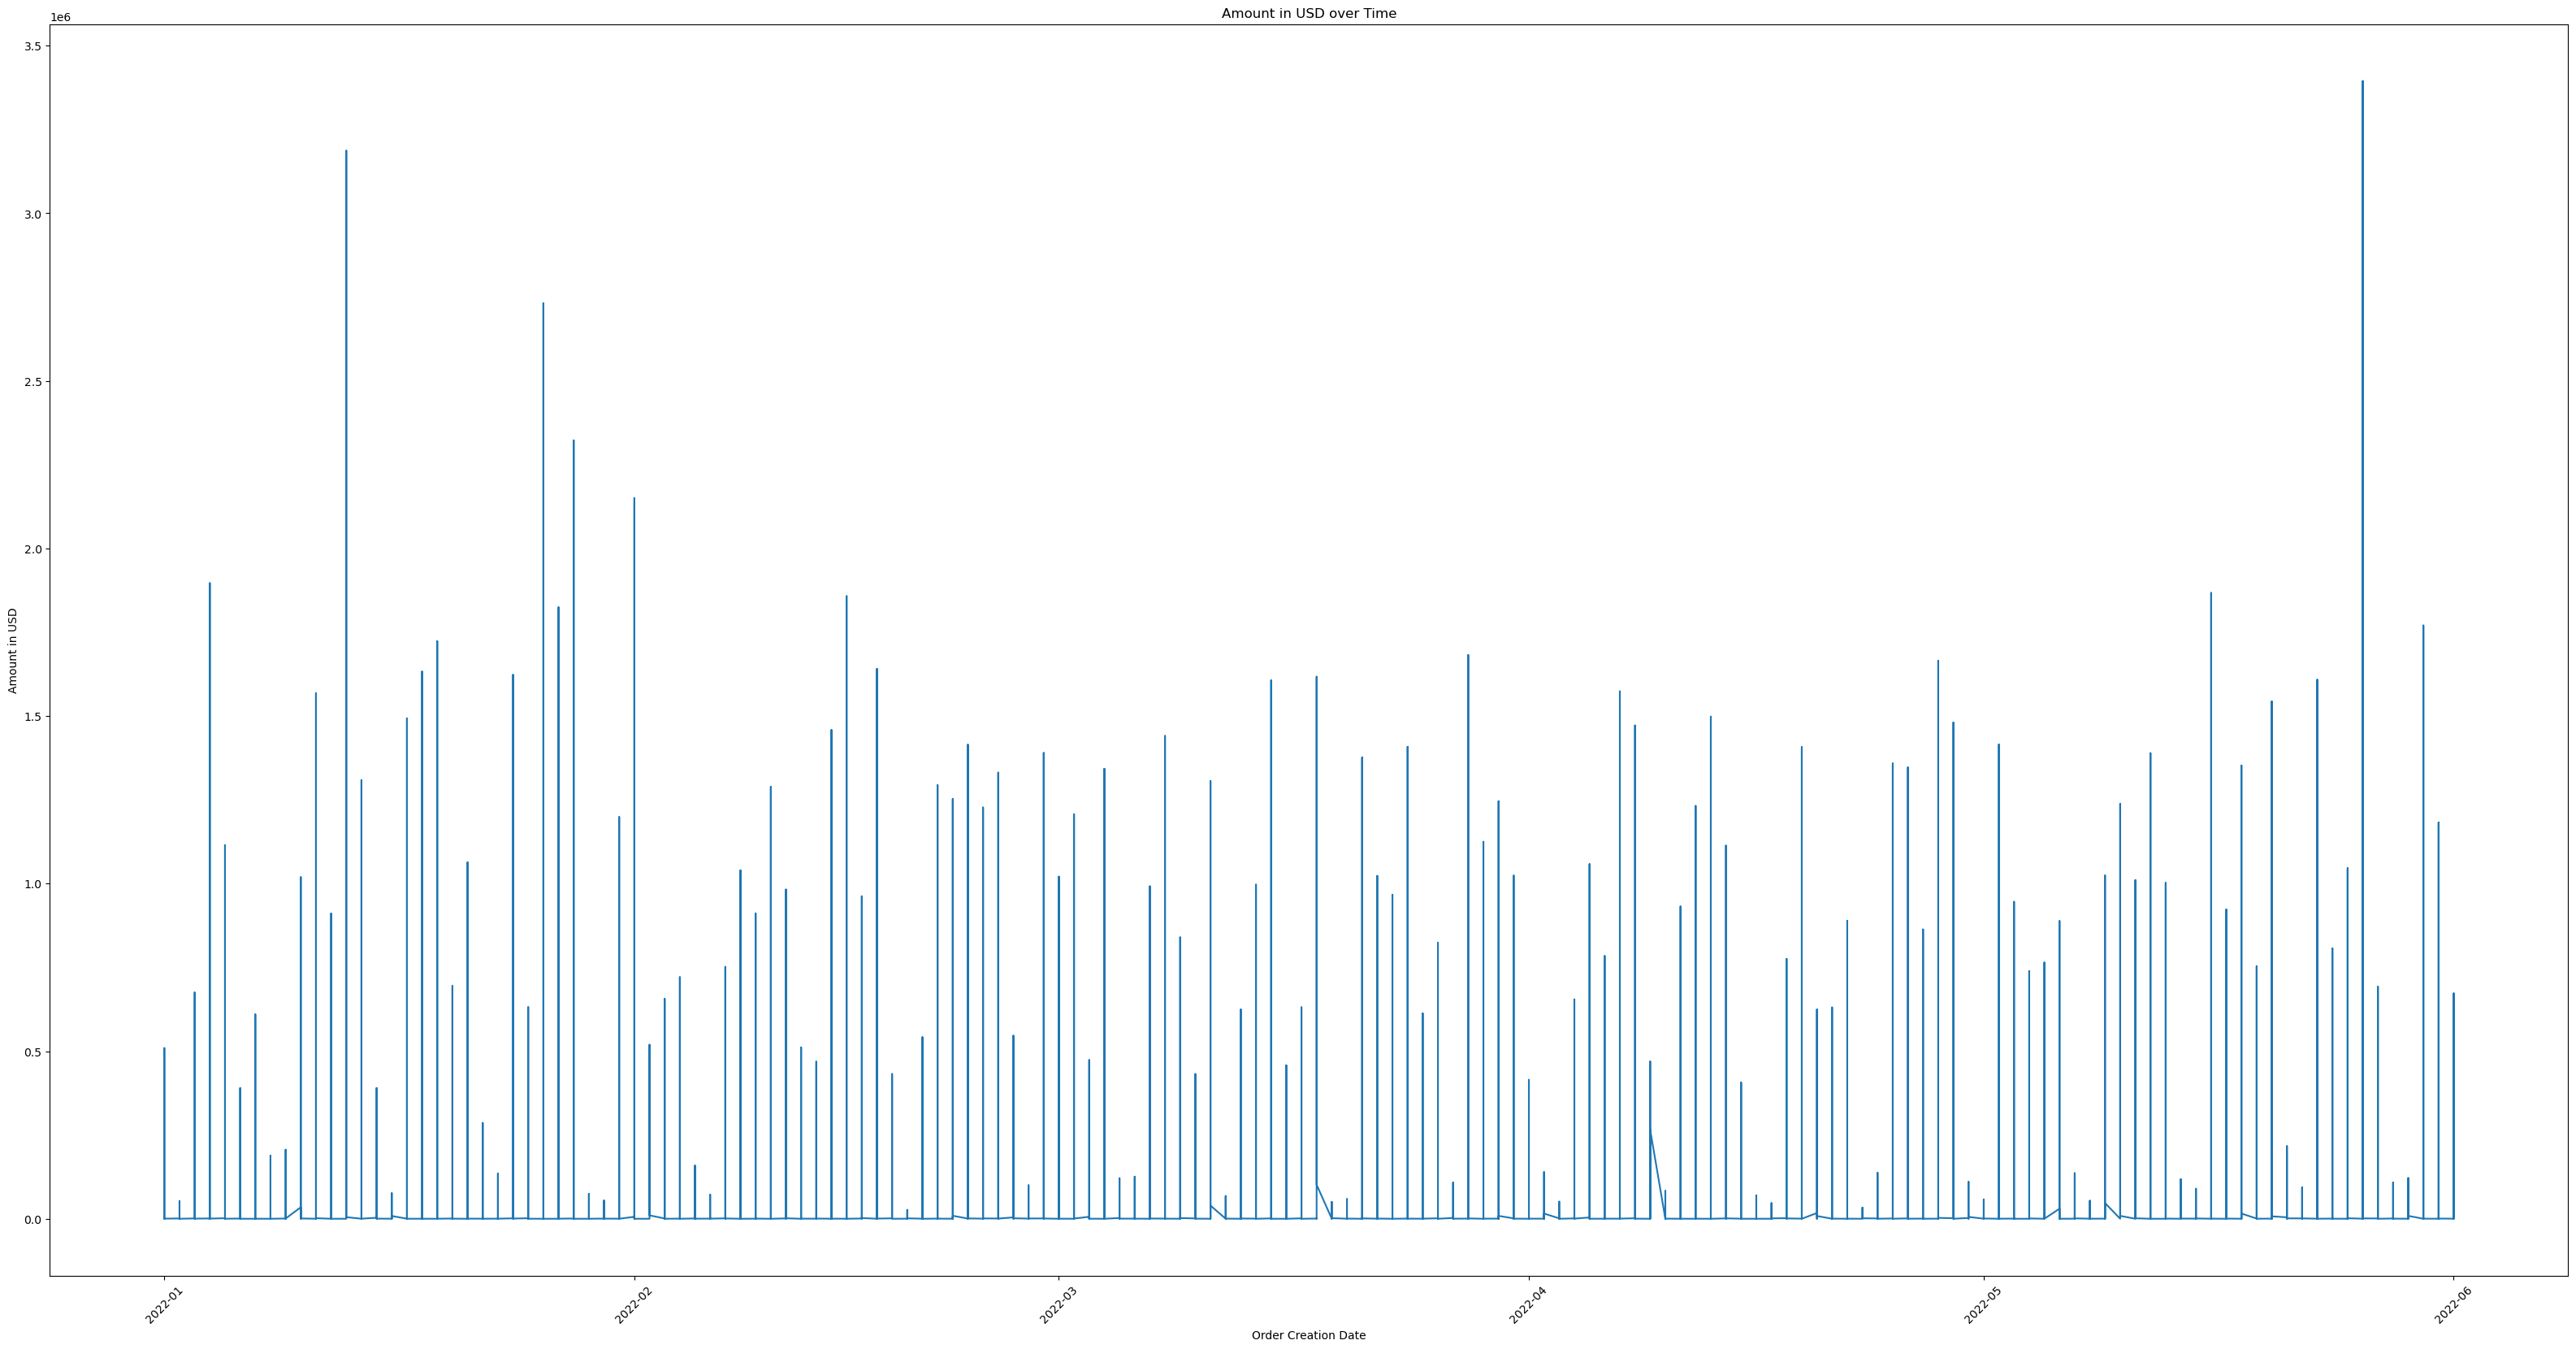

In [26]:
# The line plot shows how the purchase amount in USD (amount_in_usd) changes over time based on the order creation dates 
# (ORDER_CREATION_DATE).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])

df.sort_values(by='ORDER_CREATION_DATE', inplace=True)
plt.figure(figsize=(40, 20))

order_creation_date = df['ORDER_CREATION_DATE']
amount_data_column = df['amount_in_usd']


plt.plot(order_creation_date, amount_data_column)

plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')

plt.title('Amount in USD over Time')


plt.xticks(rotation=45)

plt.show()


# 5. Create a boxplot on ORDER_AMOUNT to find out the outliers.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


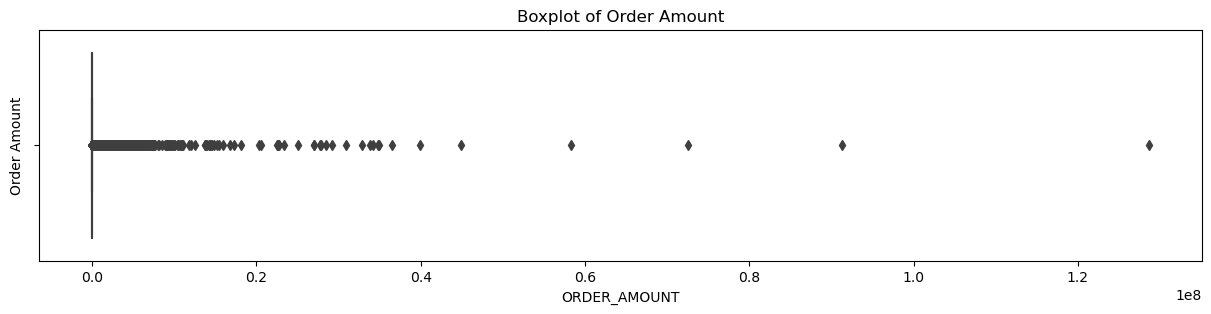

In [27]:
# The boxplot visually displays the distribution of purchase prices (ORDER_AMOUNT) and identifies any outliers,
# helping to understand the range and distribution of purchase prices in the data.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
sns.boxplot(df['ORDER_AMOUNT'].astype(float))
plt.ylabel('Order Amount')
plt.title('Boxplot of Order Amount')
plt.show()

# 6. Create a barchart on COMPANY_CODE and ORDER_AMOUNT

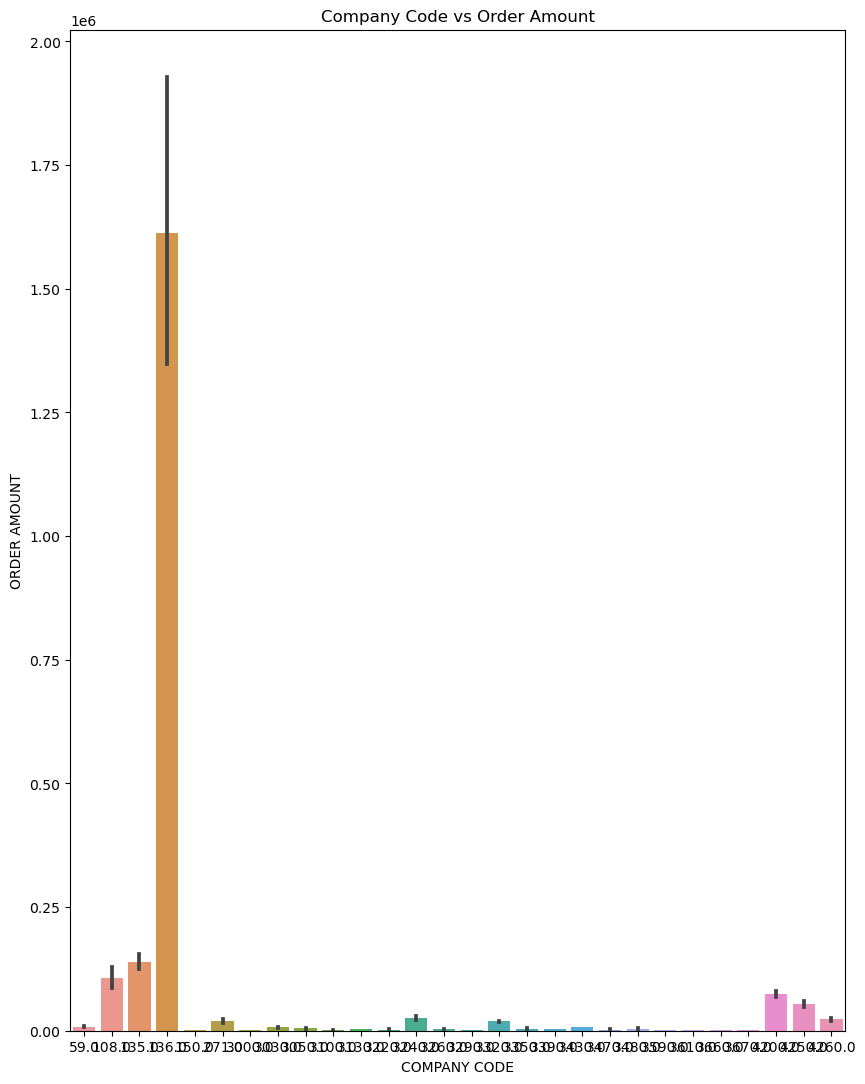

In [29]:
# The bar chart represents the total order amounts (ORDER_AMOUNT) for each unique company code (COMPANY_CODE),
# providing a visual comparison of order amounts among different company codes.
shp,shi = plt.subplots(figsize=(10, 13))
sns.barplot(x=df['COMPANY_CODE'].astype(float), y=df['ORDER_AMOUNT'].astype(float),ax=shi)
shi.set_xlabel('COMPANY CODE')
shi.set_ylabel('ORDER AMOUNT')
shi.set_title('Company Code vs Order Amount')
plt.show()

# Milestone - 3

# 1- Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.


In [30]:
# Convert 'amount_in_usd' column to numeric type
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')

Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75)
LQR = Q3 - Q1

# Define lower and upper bounds
l_b = Q1 - 1.5 * LQR
u_b = Q3 + 1.5 * LQR

# Identify outliers
outlier_idx = (df['amount_in_usd'] < l_b) | (df['amount_in_usd'] > u_b)

# Replace outliers with median
df.loc[outlier_idx, 'amount_in_usd'] = df['amount_in_usd'].median()


# 2 - Label encoding or One hot Encoding on all the categorical columns 


In [31]:
# Q2
from sklearn.preprocessing import LabelEncoder

cat_columns = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY','RELEASED_CREDIT_VALUE']

leb = LabelEncoder()

for i in cat_columns:
    df[i] = leb.fit_transform(df[i])

print(df)

         CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                946851639       3537                   232         1   
1006847          995549949       3559                    24         1   
1006848          869122376       3043                   139         1   
1006849          907014963       3391                    49         1   
1006850          804194459       2215                   238         1   
...                    ...        ...                   ...       ...   
1001983          975644617       4205                   219         0   
1001982          901650706       2714                    39         0   
1001981          803466603       2652                   114         0   
1002007          791557395       3394                    95         0   
1101924          921701000       2968                   156         1   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                            1                    0   

# 3- Log Transformations on continuous columns.

In [32]:
cont_col = df.select_dtypes(include=['float', 'int']).columns

df[cont_col] = np.log1p(df[cont_col])

In [33]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,20.668653,8.171317,5.451038,0.693147,0.693147,0.000000,8.077447,2022-01-01,10.669258,1.791759,20.443739,954.61,2022-01-13,1.945910,NaN,16.326069,6.939233,123118073220
1006847,20.718806,8.177516,3.218876,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100795,1.791759,20.488913,2610.00,2022-01-01,2.197225,NaN,20.914307,5.829828,12105098233030
1006848,20.582994,8.020928,4.941642,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.386294,20.586496,5848.50,2022-01-01,2.197225,NaN,20.914242,6.635034,12104312003030
1006849,20.625670,8.129175,3.912023,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100812,1.945910,20.560336,6045.17,2022-01-01,2.197225,NaN,20.914224,6.668066,12104088443030
1006850,20.505352,7.703459,5.476464,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.609438,20.608080,8736.00,2022-01-01,2.197225,NaN,20.914242,7.035867,12104307433030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001983,20.698609,8.344267,5.393628,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263454,1.791759,20.457777,0.00,2022-06-10,2.995732,NaN,20.930292,0.000000,12300143543660
1001982,20.619738,7.906547,3.688879,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263450,1.791759,20.575563,0.00,2022-06-10,2.995732,NaN,20.930292,0.000000,12300143543660
1001981,20.504446,7.883446,4.744932,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263445,1.386294,20.538811,0.00,2022-06-10,2.995732,NaN,20.930292,0.000000,12300143543660
1002007,20.489513,8.130059,4.564348,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263563,1.791759,20.671903,0.00,2022-06-10,2.995732,NaN,20.930292,0.000000,12300143543660


# 4 - Try to extract new features by grouping existing columns.

In [34]:
import pandas as pd

df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
#1.
#It predicts the proportion of each order's value compared to the total value of orders within its sales organization.
df['market_share'] = df['ORDER_AMOUNT'] / df.groupby('SALES_ORG')['ORDER_AMOUNT'].transform('sum')

#2.
# This feature calculates the average order amount within each sales organization (SALES_ORG).
#It uses the mean() function to compute the mean order amount for each group of sales organizations.
df['avg_order_amount_by_sales'] = df.groupby('SALES_ORG')['ORDER_AMOUNT'].transform('mean')

#3.
# It counts the number of occurrences of each unique combination using the count() function on the CUSTOMER_ORDER_ID column.
df['credit_sta_freq'] = df.groupby(['SALES_ORG', 'DISTRIBUTION_CHANNEL', 'CREDIT_STATUS'])['CUSTOMER_ORDER_ID'].transform('count')

#4.
# It counts the number of occurrences of each unique combination using the count() function on the CUSTOMER_ORDER_ID column.
df['uni_company_code'] = df.groupby(['SALES_ORG', 'DISTRIBUTION_CHANNEL'])['COMPANY_CODE'].transform('nunique')

#5.
#It uses the nunique() function to count the number of distinct values for each group.
df['sold_to_party_count'] = df.groupby(['SALES_ORG', 'DISTRIBUTION_CHANNEL'])['SOLD_TO_PARTY'].transform('nunique')

#6.
# It counts the number of occurrences of each unique combination using the count() function on the CUSTOMER_ORDER_ID column.
df['purchase_order_type_count'] = df.groupby(['SALES_ORG', 'PURCHASE_ORDER_TYPE'])['CUSTOMER_ORDER_ID'].transform('count')

# 7.
# It uses the min() function to find the minimum value for each group.
df['min_order_amount'] = df.groupby(['SALES_ORG', 'DISTRIBUTION_CHANNEL'])['ORDER_AMOUNT'].transform('min')

#8. 
# It uses the max() function to find the maximum value for each group.
df['max_order_amount'] = df.groupby(['SALES_ORG', 'DISTRIBUTION_CHANNEL'])['ORDER_AMOUNT'].transform('max')

df.head(20)



,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,amount_in_usd,unique_cust_id,market_share,avg_order_amount_by_sales,credit_sta_freq,uni_company_code,sold_to_party_count,purchase_order_type_count,min_order_amount,max_order_amount
0,20.668653,8.171317,5.451038,0.693147,0.693147,0.000000,8.077447,2022-01-01,10.669258,1.791759,...,6.939233,123118073220,0.000377,5334.448926,NaN,3,3,9,404.04,2316.88
1006847,20.718806,8.177516,3.218876,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100795,1.791759,...,5.829828,12105098233030,0.000997,5807.292550,NaN,1,1,5,2610.00,2610.00
1006848,20.582994,8.020928,4.941642,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.386294,...,6.635034,12104312003030,0.003534,3613.096921,NaN,2,2,5,0.00,5848.50
1006849,20.625670,8.129175,3.912023,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100812,1.945910,...,6.668066,12104088443030,0.005412,2386.627179,NaN,4,6,6,0.00,6045.17
1006850,20.505352,7.703459,5.476464,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.609438,...,7.035867,12104307433030,0.007253,3026.193568,NaN,1,1,3,8736.00,8736.00
1006851,20.619396,8.038835,2.397895,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100890,0.000000,...,6.311527,12103455993030,0.001263,7490.845772,NaN,3,4,1,0.00,4229.89
1006852,20.703245,7.927324,2.995732,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100929,1.609438,...,7.133233,12104088433030,0.005363,3946.854066,NaN,2,2,7,0.00,9630.16
1006853,20.689161,8.255828,2.079442,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.101023,1.386294,...,6.895709,12104072363030,0.004595,3599.865185,NaN,4,4,3,90.09,7592.51
1006854,20.706492,8.400210,5.375278,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.101295,0.000000,...,5.565815,12104071703030,0.001641,2754.386479,NaN,3,3,3,0.00,2002.60
1006878,20.533426,8.012350,3.951244,0.000000,0.693147,4.653960,8.006701,2022-01-01,11.051001,1.098612,...,6.152935,12104172983000,0.000308,5390.743528,1.0,4,4,62,0.00,710.75


# 5 - Create a heatmap to find correlation between the columns

<AxesSubplot:title={'center':'Correlation Heatmap'}>

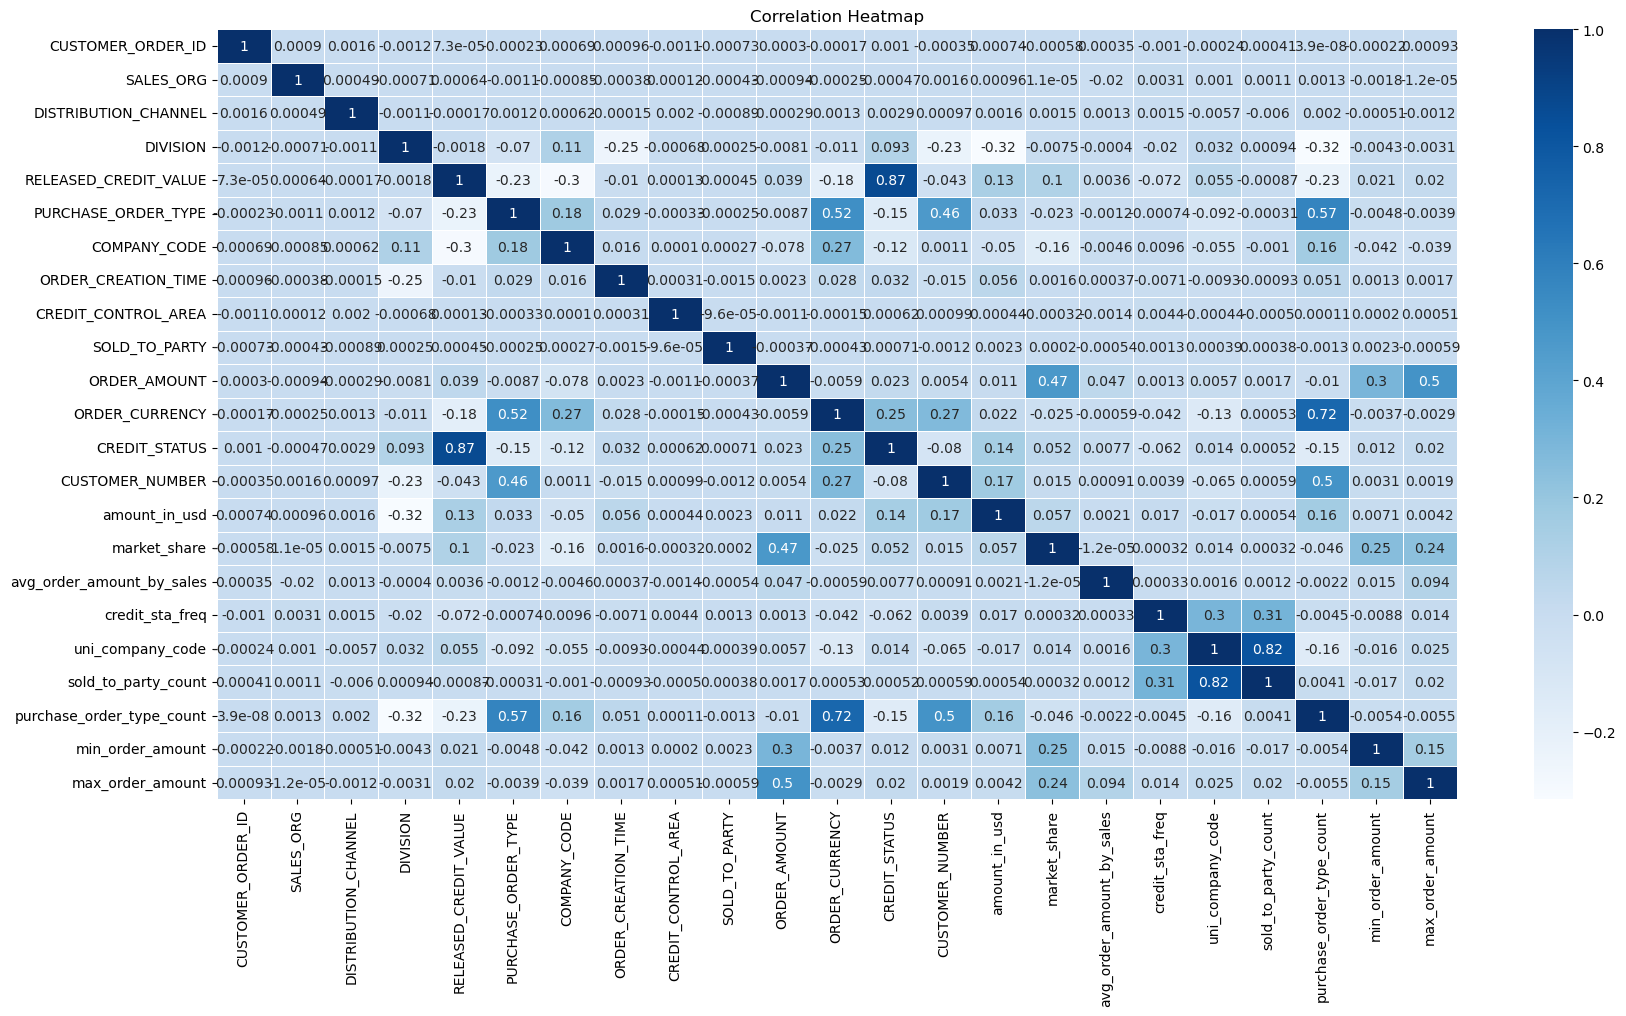

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,10))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot= True, linewidth =0.7, cmap='Blues')

# 6 - Try to identify important or relevant columns for feature extraction

In [36]:
corr_mat = df.corr()
target_corr = corr_mat['amount_in_usd'].abs()
rel_col = target_corr[target_corr > 0.3].index.tolist()
print(rel_col)

['DIVISION', 'amount_in_usd']


In [37]:
import pandas as pd

def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    # Converting the create_date_col to datetime if it's not already in datetime format
    melt[create_date_col] = pd.to_datetime(melt[create_date_col])
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop=True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt
df = difference_in_days(df, 7, 1, 'unique_cust_id', 'ORDER_CREATION_DATE', 'amount_in_usd')
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,20.668653,8.171317,5.451038,0.693147,0.693147,0.000000,8.077447,2022-01-01,10.669258,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,20.718806,8.177516,3.218876,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100795,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,20.582994,8.020928,4.941642,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.386294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,20.625670,8.129175,3.912023,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100812,1.945910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,20.505352,7.703459,5.476464,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.609438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,20.698609,8.344267,5.393628,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263454,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1074779,20.619738,7.906547,3.688879,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263450,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1074780,20.504446,7.883446,4.744932,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263445,1.386294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1074781,20.489513,8.130059,4.564348,0.000000,0.693147,5.837730,8.205492,2022-06-01,12.263563,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [38]:
df.head(20)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,20.668653,8.171317,5.451038,0.693147,0.693147,0.000000,8.077447,2022-01-01,10.669258,1.791759,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,20.718806,8.177516,3.218876,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100795,1.791759,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,20.582994,8.020928,4.941642,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.386294,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,20.625670,8.129175,3.912023,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100812,1.945910,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,20.505352,7.703459,5.476464,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100807,1.609438,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,20.619396,8.038835,2.397895,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100890,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,20.703245,7.927324,2.995732,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.100929,1.609438,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,20.689161,8.255828,2.079442,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.101023,1.386294,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,20.706492,8.400210,5.375278,0.693147,0.693147,5.056246,8.016648,2022-01-01,12.101295,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,20.533426,8.012350,3.951244,0.000000,0.693147,4.653960,8.006701,2022-01-01,11.051001,1.098612,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


# Milestone - 4

In [2]:
df.columns

NameError: name 'df' is not defined

# 2. Try different machine learning models

In [ ]:
from sklearn.model_selection 
import train_test_split
input_features =[
    'CUSTOMER_ORDER_ID',
    'COMPANY_CODE',
    'CUSTOMER_NUMBER',
    'DIVISION',
    'PURCHASE_ORDER_TYPE',
    'CREDIT_CONTROL_AREA',
    'RELEASED_CREDIT_VALUE',
    'Last-2day_Diff'
]

output_feature = 'amount_in_usd'

X = df[input_features]
y = df[output_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=350)

print("Training set shape - Input features:", X_train.shape)
print("Training set shape - Output feature:", y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np


# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions on the imputed training and testing data
train_predictions = model.predict(X_train_imputed)
test_predictions = model.predict(X_test_imputed)

# Calculate MSE
train_mse_Li = mean_squared_error(y_train, train_predictions)
test_mse_Li = mean_squared_error(y_test, test_predictions)

# Calculate RMSE
train_rmse_Li = np.sqrt(train_mse_Li)
test_rmse_Li = np.sqrt(test_mse_Li)

# Calculate R-squared
train_r2_Li = r2_score(y_train, train_predictions)
test_r2_Li = r2_score(y_test, test_predictions)


# Print the evaluation metrics

print("Test MSE:", test_mse_Li)
print("Test RMSE:", test_rmse_Li)
print("Test R-squared:", test_r2_Li)


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

# Preprocess the data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create an AdaBoostRegressor model
adaboost = AdaBoostRegressor()

# Fit the model on the training data
adaboost.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = adaboost.predict(X_test_scaled)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred)

######
y_train_pred = adaboost.predict(X_train_scaled)

# Compute MSE on the training data
mse_train_ada = mean_squared_error(y_train, y_train_pred)

# Compute RMSE on the training data
rmse_train_ada = np.sqrt(mse_train_ada)

# Compute R2 on the training data
r2_train_ada = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training data
print("Train Mean Squared Error (MSE):", mse_train_ada)
print("Train Root Mean Squared Error (RMSE):", rmse_train_ada)
print("Train R-squared (R2):", r2_train_ada)
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_ada)
print("Root Mean Squared Error (RMSE):", rmse_ada)
print("R-squared (R2):", r2_ada)


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preprocess the data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create a DecisionTreeRegressor model
decision_tree = DecisionTreeRegressor()

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred)
y_train_pred = decision_tree.predict(X_train_scaled)

# Compute MSE on the training data
mse_train_dt = mean_squared_error(y_train, y_train_pred)

# Compute RMSE on the training data
rmse_train_dt = np.sqrt(mse_train_dt)

# Compute R2 on the training data
r2_train_dt = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training data
print("Train Mean Squared Error (MSE):", mse_train_dt)
print("Train Root Mean Squared Error (RMSE):", rmse_train_dt)
print("Train R-squared (R2):", r2_train_dt)
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2):", r2_dt)


#  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# Preprocess the data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create a RandomForestRegressor model
random_forest = RandomForestRegressor()

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

# Make predictions on the training data
y_train_pred = random_forest.predict(X_train_scaled)

# Evaluate the model on the training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for training data
print("Training Data Metrics:")
print("Mean Squared Error (MSE):", mse_train_rf)
print("Root Mean Squared Error (RMSE):", rmse_train_rf)
print("R-squared (R2):", r2_train_rf)
# Print the evaluation metrics
print("Testing Data Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


# Support Vector Machine 


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the input features and output feature
input_features = [
    'DIVISION',
    'market_share',
    'SOLD_TO_PARTY',
    'avg_order_amount_by_sales',
    'credit_sta_freq',
    'ORDER_CURRENCY',
    'CREDIT_STATUS',
    'SALES_ORG'
]
output_feature = 'amount_in_usd'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=350)

# Preprocess the data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create an SVR model
svm = SVR()

# Fit the model on the training data
svm.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


In [ ]:
import pickle
file = 'finalized_model.sav'
pickle.dump(xgb_model, open(file, 'wb'))

# Xgboost 

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have the feature matrix X_train and target vector y_train for training
# Assuming you have the feature matrix X_test and target vector y_test for testing

# Create the XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = xgb_model.predict(X_train)

# Calculate evaluation metrics for training data
mae_train_xg = mean_absolute_error(y_train, y_train_pred)
mse_train_xg = mean_squared_error(y_train, y_train_pred)
rmse_train_xg = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train_xg = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for test data
mae_test_xg = mean_absolute_error(y_test, y_test_pred)
mse_test_xg = mean_squared_error(y_test, y_test_pred)
rmse_test_xg = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test_xg = r2_score(y_test, y_test_pred)

# Display the evaluation metrics for training data
print("Training Data:")
print("Mean Absolute Error (MAE):", mae_train_xg)
print("Mean Squared Error (MSE):", mse_train_xg)
print("Root Mean Squared Error (RMSE):", rmse_train_xg)
print("R-squared (R2):", r2_train_xg)

# Display the evaluation metrics for test data
print("Test Data:")
print("Mean Absolute Error (MAE):", mae_test_xg)
print("Mean Squared Error (MSE):", mse_test_xg)
print("Root Mean Squared Error (RMSE):", rmse_test_xg)
print("R-squared (R2):", r2_test_xg)

# 3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.


In [ ]:
# print("R2 Score of all Models")
# print("Linear Regression",test_r2_Li)
# print("Decision Tree",r2_dt)
# print("Random Forest",r2_rf)
# print("Xgboost", r2_test_xg)
# print("AdaBoostRegressor",r2_ada)
# # print("SVM",r2_SVM)

In [ ]:
# print("RMSE Score of all Models")
# print("Linear Regression",test_rmse_Li)
# print("Decision Tree",rmse_dt)
# print("Random Forest",rmse_rf)
# print("Xgboost",rmse_test_xg)
# print("AdaBoostRegressor",rmse_ada)

# 4. Compare the accuracies of all the models 


In [ ]:
# model_names = ['XGBoost', 'Random Forest', 'AdaBoostRegressor', 'Decision Tree', 'Linear Regression']

# # Define the evaluation metric values for each model
# r_squared = [r2_test_xg, r2_rf, r2_dt, r2_ada, test_r2_Li]
# rmse = [rmse_test_xg, rmse_rf,  rmse_dt,  rmse_ada,  test_rmse_Li]
# mse = [mse_test_xg, mse_rf, mse_dt, mse_ada, test_mse_Li]

# # Create a list of lists to hold the data for the table
# table_data = []
# for i in range(len(model_names)):
#     table_data.append([model_names[i], r_squared[i], rmse[i], mse[i]])

# # Define the headers for the table
# headers = ['Model', 'R-squared', 'RMSE', 'MSE']
# print("Evaluation metric for testing data : ")

# # Print the table using tabulate
# print(tabulate(table_data, headers, tablefmt="fancy_grid"))
# r_squared = [r2_train_xg, r2_train_rf, r2_train_dt, r2_train_ada, test_r2_Li]
# rmse = [rmse_train_xg, rmse_train_rf,  rmse_train_dt,  rmse_train_ada,  train_rmse_Li]
# mse = [mse_test_xg, mse_rf, mse_dt, mse_ada, test_mse_Li]

# # Create a list of lists to hold the data for the table
# table_data = []
# for i in range(len(model_names)):
#     table_data.append([model_names[i], r_squared[i], rmse[i], mse[i]])

# # Define the headers for the table
# headers = ['Model', 'R-squared', 'RMSE', 'MSE']
# print("Evaluation metric for training data : ")
# # Print the table using tabulate
# print(tabulate(table_data, headers, tablefmt="fancy_grid"))


# 5. Select the best possible model.

In [ ]:
print("Best model predicted is XGBoost regression i.e :", r2_test_xg )

# 6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


# 1.Grid SearchCV

In [ ]:
# # import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Assuming you have the feature matrix X_train and target vector y_train for training
# # Assuming you have the feature matrix X_test and target vector y_test for testing

# # Create the XGBoost regression model
# xgb_model = xgb.XGBRegressor()

# # Define the hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 500, 1000],
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)

# # Get the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Fit the best model on the training data
# best_model.fit(X_train, y_train)

# # Predict on the training data
# y_train_pred = best_model.predict(X_train)

# # Calculate evaluation metrics for training data
# mae_train_xg = mean_absolute_error(y_train, y_train_pred)
# mse_train_xg = mean_squared_error(y_train, y_train_pred)
# rmse_train_xg = mean_squared_error(y_train, y_train_pred, squared=False)
# r2_train_xg = r2_score(y_train, y_train_pred)

# # Predict on the test data
# y_test_pred = best_model.predict(X_test)

# # Calculate evaluation metrics for test data
# mae_test_xg = mean_absolute_error(y_test, y_test_pred)
# mse_test_xg = mean_squared_error(y_test, y_test_pred)
# rmse_test_xg = mean_squared_error(y_test, y_test_pred, squared=False)
# r2_test_xg = r2_score(y_test, y_test_pred)

# # Display the best hyperparameters
# print("Best Hyperparameters:", best_params)
# print()

# # Display the evaluation metrics for training data
# print("Training Data:")
# print("Mean Absolute Error (MAE):", mae_train_xg)
# print("Mean Squared Error (MSE):", mse_train_xg)
# print("Root Mean Squared Error (RMSE):", rmse_train_xg)
# print("R-squared (R2):", r2_train_xg)
# print()

# # Display the evaluation metrics for test data
# print("Test Data:")
# print("Mean Absolute Error (MAE):", mae_test_xg)
# print("Mean Squared Error (MSE):", mse_test_xg)
# print("Root Mean Squared Error (RMSE):", rmse_test_xg)
# print("R-squared (R2):", r2_test_xg)


# 2.Randomised Search CV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you have the feature matrix X_train and target vector y_train for training
# Assuming you have the feature matrix X_test and target vector y_test for testing

# Create the XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_model.predict(X_train)

# Calculate evaluation metrics for training data
mae_train_xg = mean_absolute_error(y_train, y_train_pred)
mse_train_xg = mean_squared_error(y_train, y_train_pred)
rmse_train_xg = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train_xg = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for test data
mae_test_xg = mean_absolute_error(y_test, y_test_pred)
mse_test_xg = mean_squared_error(y_test, y_test_pred)
rmse_test_xg = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test_xg = r2_score(y_test, y_test_pred)

# Display the best hyperparameters
print("Best Hyperparameters:", best_params)
print()

# Display the evaluation metrics for training data
print("Training Data:")
print("Mean Absolute Error (MAE):", mae_train_xg)
print("Mean Squared Error (MSE):", mse_train_xg)
print("Root Mean Squared Error (RMSE):", rmse_train_xg)
print("R-squared (R2):", r2_train_xg)
print()

# Display the evaluation metrics for test data
print("Test Data:")
print("Mean Absolute Error (MAE):", mae_test_xg)
print("Mean Squared Error (MSE):", mse_test_xg)
print("Root Mean Squared Error (RMSE):", rmse_test_xg)
print("R-squared (R2):", r2_test_xg)


# 7. Come up with the best possible model accuracy.


In [ ]:
print("Best model predicted is XGBoost regression i.e :", r2_test_xg )

### Name- Pratik 
### Uid - H2H11483K